# Problem
The data set contains diagnostic information of Stage of Breast Cancer (Malignant or Benign) of 569 patients.  
It has the following information: 
1. Patient ID
2. Stage of Breast Cancer (M = Malignant, B = Benign)
3. Columns 3-32 contain 10 real valued features listed below with their respective Mean (Cols 3-13), Standard Error(Cols 13-23) and Worst (Cols 23-32)

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g). concavity (severity of concave portions of the contour)
    h). concave points (number of concave portions of the contour)
    i). symmetry
    j). fractal dimension ("coastline approximation" - 1)

I want to develop a basic Machine Learning model to predict the Stage of Breast Cancer based on these above mentioned 10 variables, visualize the known data along with predicted to check for accuracy of the model and test data predcition.  

Steps I followed:
1. Read the data, clean, sort and inspect.
2. Analyzing correlation between variables.
3. Apply ML methods
    3.1 Split the test & train data
    3.2 Trained a logistic regression model to build a classification model and fit  data
    3.3 Visualize to compare the accuracy of the used method
4. Test Dataset Prediction
5. There are in all 30 features in the data Mean values of the above listed 10 parameters, their Std. errors, and worst values. How can one leverage all this information to develop a better model. Do we need a dimension reduction or the insights derived from correlation among features is good enough.  

In [1]:
#Import required python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("../input/data.csv", index_col=0)

In [3]:
data.head()

diagnosis     ...       Unnamed: 32
id                     ...                  
842302           M     ...               NaN
842517           M     ...               NaN
84300903         M     ...               NaN
84348301         M     ...               NaN
84358402         M     ...               NaN

[5 rows x 32 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

Let's remove the empty column "Unamed: 32'

In [5]:
data = data.drop(['Unnamed: 32'], axis =1)

In [6]:
data.head()

diagnosis           ...             fractal_dimension_worst
id                           ...                                    
842302           M           ...                             0.11890
842517           M           ...                             0.08902
84300903         M           ...                             0.08758
84348301         M           ...                             0.17300
84358402         M           ...                             0.07678

[5 rows x 31 columns]

In [7]:
data.shape

(569, 31)

In [8]:
data.isna().any().head() #Check for Missing data 

diagnosis         False
radius_mean       False
texture_mean      False
perimeter_mean    False
area_mean         False
dtype: bool

Text(0.5,1,'Histogram plot for both type of diagnosis')

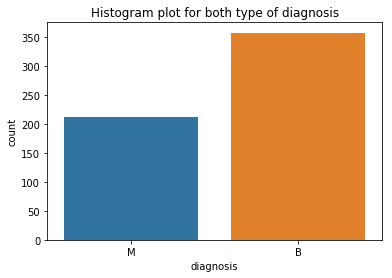

In [9]:
sns.countplot(x = 'diagnosis', data = data).set_title('Histogram plot for both type of diagnosis')

In [10]:
data.describe()

radius_mean           ...             fractal_dimension_worst
count   569.000000           ...                          569.000000
mean     14.127292           ...                            0.083946
std       3.524049           ...                            0.018061
min       6.981000           ...                            0.055040
25%      11.700000           ...                            0.071460
50%      13.370000           ...                            0.080040
75%      15.780000           ...                            0.092080
max      28.110000           ...                            0.207500

[8 rows x 30 columns]

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


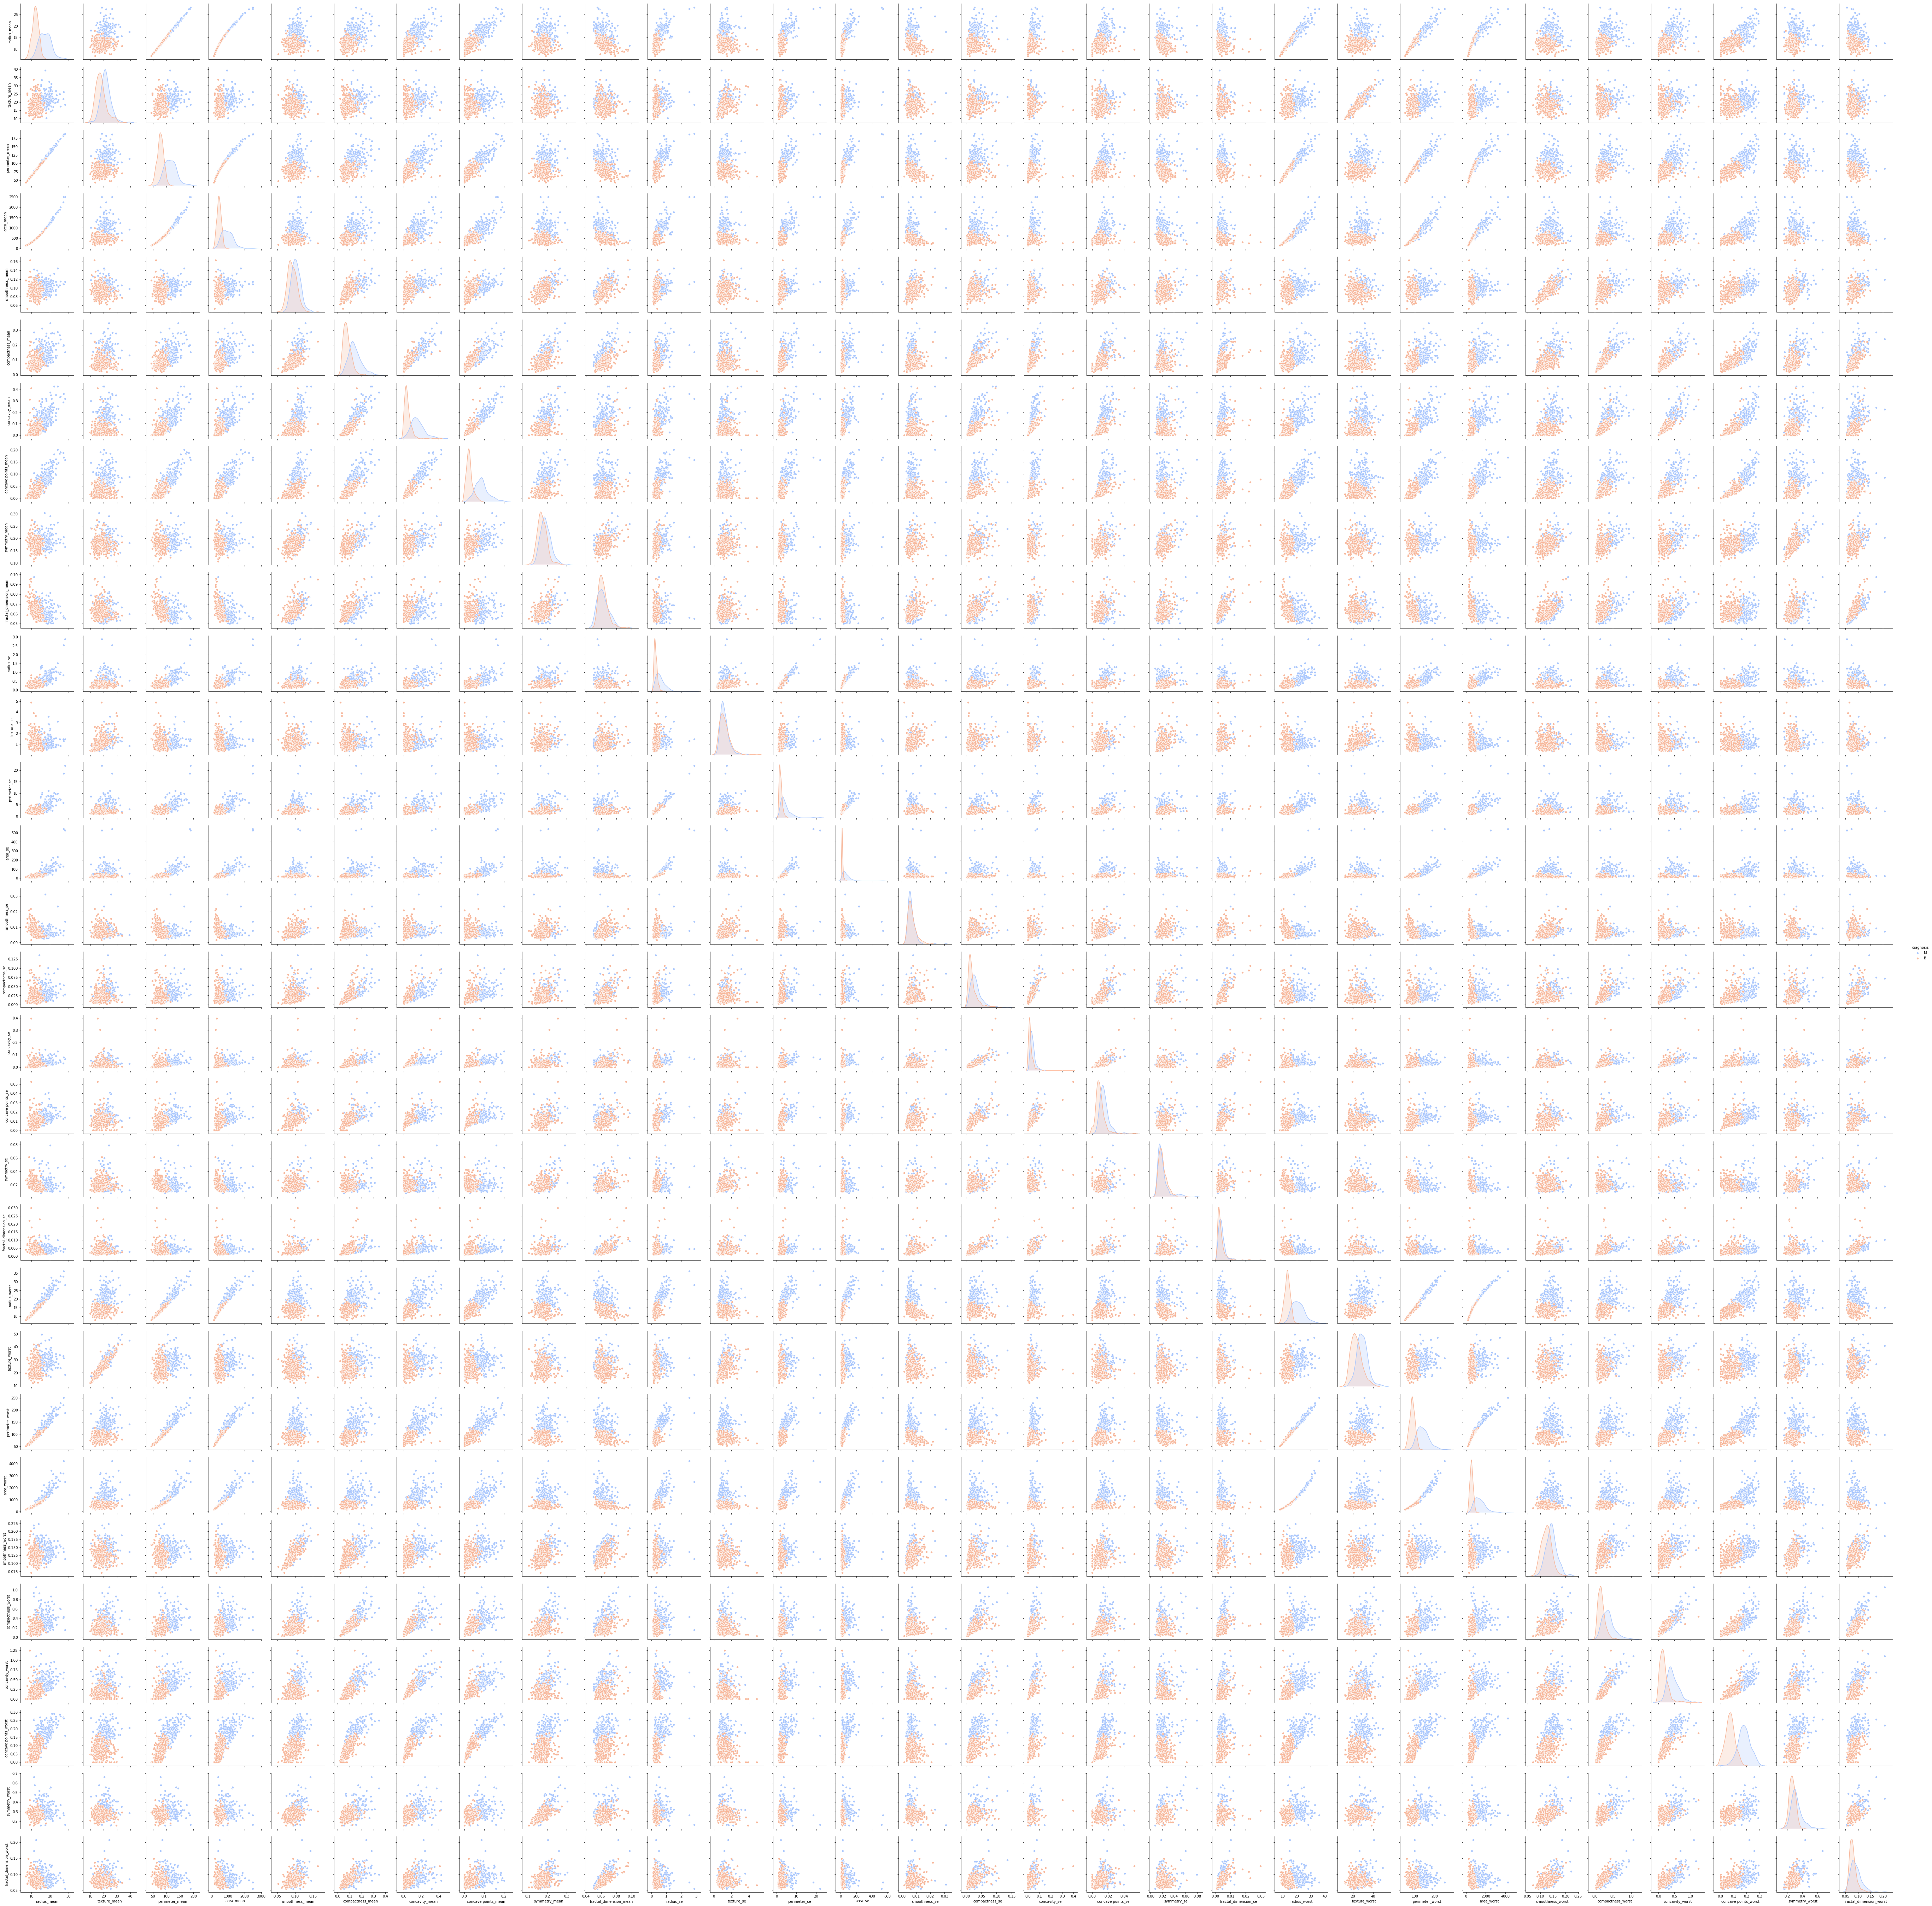

In [11]:
sns.pairplot(data, hue = 'diagnosis',palette='coolwarm')

In [12]:
dataM=data[data['diagnosis'] == "M"]
dataB=data[data['diagnosis'] == "B"]

Visualization distribution of each of the diagnostic image parameter mean values for ``M`` and ``B`` cases.  

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


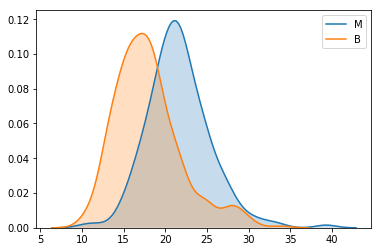

In [13]:
sns.kdeplot(dataM.texture_mean, shade=True, label= "M");
sns.kdeplot(dataB.texture_mean, shade=True, label= "B");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


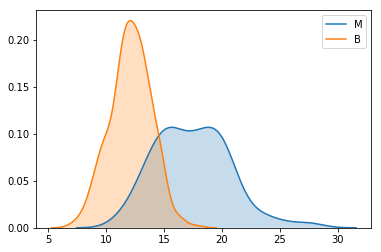

In [14]:
sns.kdeplot(dataM.radius_mean, shade=True, label= "M");
sns.kdeplot(dataB.radius_mean, shade=True, label= "B");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


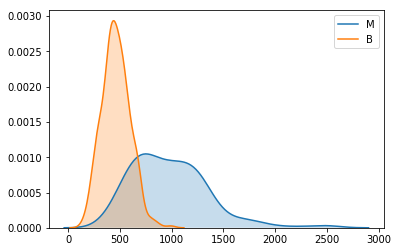

In [15]:
sns.kdeplot(dataM.area_mean, shade=True, label= "M");
sns.kdeplot(dataB.area_mean, shade=True, label= "B");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


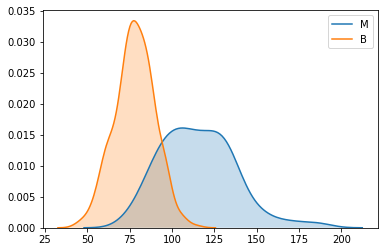

In [16]:
sns.kdeplot(dataM.perimeter_mean, shade=True, label= "M");
sns.kdeplot(dataB.perimeter_mean, shade=True, label= "B");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


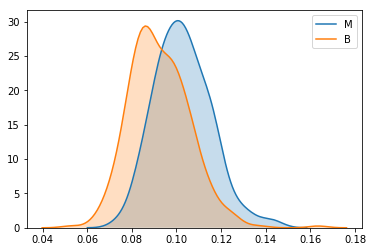

In [17]:
sns.kdeplot(dataM.smoothness_mean, shade=True, label= "M");
sns.kdeplot(dataB.smoothness_mean, shade=True, label= "B");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


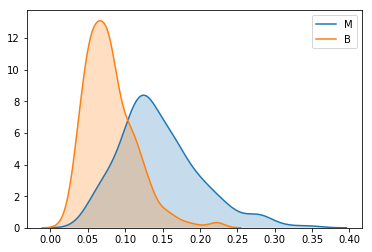

In [18]:
sns.kdeplot(dataM.compactness_mean, shade=True, label= "M");
sns.kdeplot(dataB.compactness_mean, shade=True, label= "B");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


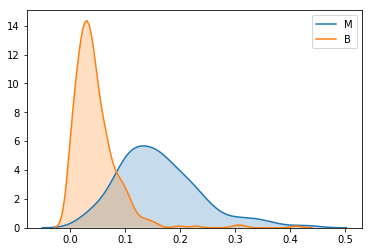

In [19]:
sns.kdeplot(dataM.concavity_mean, shade=True, label= "M");
sns.kdeplot(dataB.concavity_mean, shade=True, label= "B");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


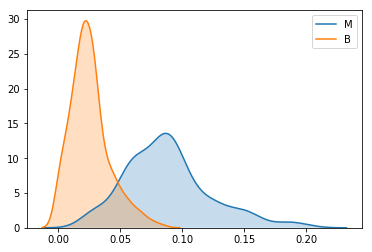

In [20]:
sns.kdeplot(dataM['concave points_mean'], shade=True, label= "M");
sns.kdeplot(dataB['concave points_mean'], shade=True, label= "B");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


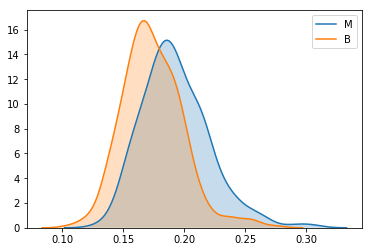

In [21]:
sns.kdeplot(dataM['symmetry_mean'], shade=True, label= "M");
sns.kdeplot(dataB['symmetry_mean'], shade=True, label= "B");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


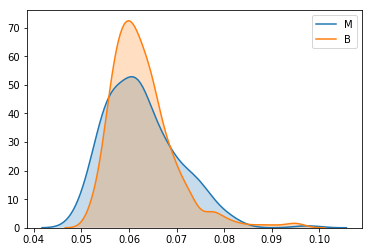

In [22]:
sns.kdeplot(dataM['fractal_dimension_mean'], shade=True, label= "M");
sns.kdeplot(dataB['fractal_dimension_mean'], shade=True, label= "B");

From the correlation of all the mean parameters and also from the visualiation of distribution of mean values of paramters (for both ``M`` and ``B`` cases), we can make the following observations:

1. Strong correlation among radius_mean, perimeter_mean and area_mean, and also similar distribution of these three parameters clearly indicate that they have similar impact on the diagnosis. 
2. Also, same holds for concavity mean and concave points_mean. 
3. The distribution of fractal_dimension_mean almost overlaps for ``M`` and ``B`` cases, which indicates that diagnosis is hardly dependant on this particular parameter.

# Analysis and modelling (Trial 1)

For the first trial, I am using all the mean values as parameter variables for predictional modelleing. 
LogisticRegression has been used to fit and predict the data.

There are 569 enteries in this data, I am using first 400 for predicition and the remaining 169 for testing the prediction. 
In a similar way, as we did for the cryptocurrency example in the last class. 

This problem has been done by hundreds of kaggle users, but my approach is very basic here. I am using all the 10 mean parameter values even though some of them are highly correlated among themselves (for eg. radius, perimeter and area .. so are concavity and concave points )

In [23]:
train_data = data[0:400]
train_data.shape

(400, 31)

In [24]:
test_data = data[400:]
test_data.shape

(169, 31)

In [25]:
from scipy import stats
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='liblinear')

In [26]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
logreg.fit(train_data[['radius_mean','texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 
                         'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']],
         train_data['diagnosis']);
slopes_list = logreg.coef_
u = logreg.intercept_

In [28]:
print(slopes_list,u)

[[-4.13808136  0.23278775  0.40572147  0.02703478  0.33369042  0.94159676
   1.25973251  0.63663298  0.3891421   0.0830127 ]] [-0.67669608]


In [29]:
predicted_diag = logreg.predict(test_data[['radius_mean','texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean', 
                         'concavity_mean', 'concave points_mean','symmetry_mean', 'fractal_dimension_mean']]);

In [30]:
data_predicted = test_data.copy()
data_predicted ["Predicted_diagnosis"] = predicted_diag.tolist()
data_predicted[['diagnosis','Predicted_diagnosis']].head()

diagnosis Predicted_diagnosis
id                                    
90439701         M                   M
904647           B                   B
904689           B                   B
9047             B                   B
904969           B                   B

# Result (Trial 1) 
Accuracy of prediction for Trial 1 is ~89.9%

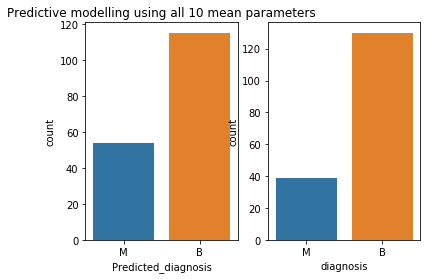

In [31]:
fig,ax =plt.subplots(1,2)
sns.countplot(data_predicted['Predicted_diagnosis'], ax=ax[0]).set_title('Predictive modelling using all 10 mean parameters')
sns.countplot(data_predicted['diagnosis'], ax=ax[1])

In [32]:
test_prediction_accuracy = (data_predicted["Predicted_diagnosis"] == data_predicted['diagnosis']).sum()*100/169
test_prediction_accuracy

89.94082840236686

# Analysis and modelling (Trial )

For the second trial, I am using all the mean values of texture, perimeter, smoothness, compactness, concavity, and symmtery. Again, LogisticRegression has been used to fit and predict the data.

Similarly the test and train data has 400 and 169 enteries as Trial 1. 

In [33]:
data1 = data.copy()
logreg.fit(train_data[['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 
                         'concavity_mean', 'symmetry_mean']],
         train_data['diagnosis']);
slopes_list1 = logreg.coef_
u1 = logreg.intercept_
print(slopes_list1,u1)


[[ 0.05488098  0.06452819 -0.11771802  1.4743835   2.70340944 -0.45489647]] [-7.48441246]


In [34]:
prediction2= logreg.predict(test_data[['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 
                                       'concavity_mean', 'symmetry_mean']]);
data_predicted ["Predicted_diagnosis2"] = prediction2.tolist()
data_predicted[['diagnosis','Predicted_diagnosis','Predicted_diagnosis2']].head()

diagnosis Predicted_diagnosis Predicted_diagnosis2
id                                                         
90439701         M                   M                    M
904647           B                   B                    B
904689           B                   B                    B
9047             B                   B                    B
904969           B                   B                    B

# Result (Trial 2) 
Accuracy of prediction for Trial 1 is ~91.1%

In [35]:
test_prediction_accuracy2 = (data_predicted["Predicted_diagnosis2"] == data_predicted['diagnosis']).sum()*100/169
test_prediction_accuracy2

91.12426035502959

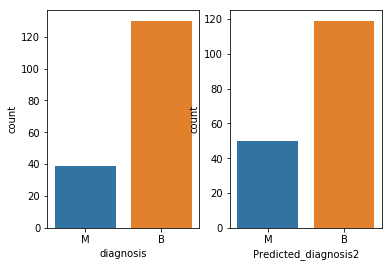

In [36]:
fig,ax =plt.subplots(1,2)
sns.countplot(data_predicted['diagnosis'], ax=ax[0])
sns.countplot(data_predicted['Predicted_diagnosis2'], ax=ax[1])
